# Cálculo simbólico em Python 🐍
#### Jorge Gustavo Rocha<br/>Departamento de Informática, Universidade do Minho<br/>25 de maio de 2020


O módulo [SymPy](https://docs.sympy.org/latest/index.html) suporta o cálculo simbólico. Em vez de lidar apenas com números e operações sobre os mesmos, como acontece no cálculo numérico, o SymPy permite-nos lidar com símbolos e realizar operações que manipulam esses símbolos. Isto permite-nos, entre outras coisas, trabalhar com representações exactas e não com aproximações.

O módulo é bastante abrangente e inerentemente **complexo**, até porque liga com algumas questões da matemética que já não são triviais. Contudo, como vamos tentar ilustrar, embora seja um módulo complexo, consegue-se usar com alguma facilidade.

Antes de mais, instale o módulo `sympy`. Se usa o Anaconda, acrescente o SymPy. Se usa a linha de comandos, faça: `pip3 install sympy`.

### Limitações do cálculo numérico

Vejamos o primeio exemplo: a operação `math.sqrt()` permite-nos calcular a raíz quadrada de um número. A raíz quadrada de 2, por exemplo, é um [número irracional](https://pt.wikipedia.org/wiki/N%C3%BAmero_irracional) que não conseguimos representar com toda a precisão em computador. Usa-se sempre uma aproximação.


In [1]:
import math
#
print(math.sqrt(2))
print(math.sqrt(2)**2)

1.4142135623730951
2.0000000000000004


O exemplo anterior exemplifica a limitação do cálculo numérico: o quadrado da raíz quadrada não é (exatamente) igual a 2.

### Símbolos em vez de números

O cálculo simbólico permite-nos representar o número irracional $\sqrt 2$ por `sympy.sqrt(2)`. Assim sendo, o quadrado `sympy.sqrt(2)` dá como resultado 2.

In [2]:
import sympy
sympy.sqrt(2)**2

2

In [3]:
sympy.sqrt(2)

sqrt(2)

Verificam-se o mesmo tipo de limitações do cálculo númerico com os números racionais. Repare que o resultado da soma seguinte não está correta.

In [4]:
i = 1/10
j = 1/10
k = 1/10
i+j+k

0.30000000000000004

Usando o suporte do SymPy à representação de números racionais, pode-se representar com exatidão o valor $1/10$. 

Depois de feitos os cálculos e obtidos os resultados usando a representação simbólica, pode-se obter o valor real aproximado, usando o método `evalf()` para transformar a expressão num valor númerico (um `float`).

In [5]:
i = j = k = sympy.Rational(1,10)
i+j+k

3/10

In [6]:
(i+j+k).evalf()

0.300000000000000

A noção matemática do $\pi$ ou do infinito, entre muitas, estão disponíveis SymPy.

In [7]:
sympy.oo

oo

In [8]:
sympy.pi

pi

### Operações com símbolos

Ao contrário das expressões numéricas, em que uma variável representa um número, no cálculo simbólico é preciso declarar explicitamente os símbolos que vamos usar.

In [9]:
x = sympy.Symbol('x')
y = sympy.Symbol('y')
# alternativamente, pode-se fazer:
# x, y = sympy.symbols('x y')

Depois de declarados os símbolos, as operações sobre os mesmos são simbólicas.

In [10]:
x+2*y+x-y

2*x + y

As expressões simbólicas podem ser expandidas `expand()`, simplificadas `simplify()`, resolvidas `solve()` ou até representadas graficamente.

Vamos ver as operações básicas sobre expressões simbólicas.

#### `simplify()`
Considere a expressão $$\frac{1}{x}+\frac{(x \cdot \sin(x) -1)}{x}$$
Simplifique a expressão manualmente e veja de seguida como a mesma é simplificada pelo SymPy.

In [11]:
x = sympy.Symbol('x')
c = 1/x + (x*sympy.sin(x) - 1)/x
sympy.simplify(c)

sin(x)

Já agora, repare que os resultados das expressões do SymPy são apresentadas com uma forma bem mais simpática, utilizando os símbolos matemáticos mais adequados.

Neste notebook, em vez de se usar o `print()` para se apresentar as expressões, usa-se apenas a expressão, que é o mesmo que fazer `display()`.

Veja as diferenças:

In [12]:
# visualização pouco simpática
print(c)

(x*sin(x) - 1)/x + 1/x


In [13]:
# visualização simpática
# display(c)
# ou simplesmente:
c

(x*sin(x) - 1)/x + 1/x

#### `expand()`

Considere a seguinte expressão e veja como a mesma pode ser expandida.

In [14]:
x, y = sympy.symbols('x y')
d = 3*(x+y)**2+2*y+x**2+1
d

x**2 + 2*y + 3*(x + y)**2 + 1

In [15]:
sympy.expand(d)

4*x**2 + 6*x*y + 3*y**2 + 2*y + 1

#### `solve()`

Considere estas duas expressões diferentes: $$ 2\cdot x+4 =0 $$ e $$ x^2-2y-6=0 $$
Podemos pedir para resolver a equação, sendo que para a segunda, o valor dependerá de `y`.

Nota: usa-se o método `sympy.Eq()` para criar uma igualdade simbólica. Não se usa o operador `==` nativo do Python.

In [16]:
e = sympy.Eq(2*x+4, 0)
i = sympy.Eq(x**2-2*y-6, 0)

In [17]:
sympy.solve(e)

[-2]

In [18]:
sympy.solve(i)

[{y: x**2/2 - 3}]

#### `plot()`

As expressões anteriores podem ser visualizadas de uma forma bastante imediata, usando o método `sympy.plot_implicit()`. Os gráficos do SymPy não são tão flexíveis como os da biblioteca `matplolib`, mas são bastante práticos.

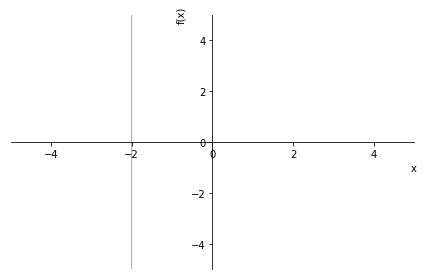

In [19]:
sympy.plot_implicit(e)

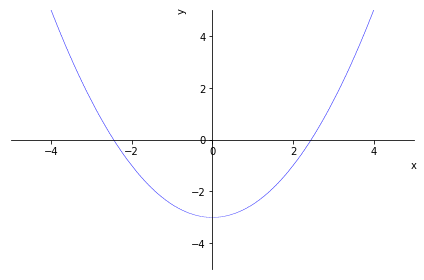

In [20]:
sympy.plot_implicit(i)

### Exercícios

1.  Diga qual é a solução da equação $$ x^2 - 1$$

In [21]:
sympy.solve(x**2-1)

[-1, 1]

2.  Simplifique a expressão $$ \frac{\sin^4(x)-\cos^4(x)}{\sin^2(x)-\cos^2(x)} $$

In [22]:
sympy.simplify((sympy.sin(x)**4-sympy.cos(x)**4)/(sympy.sin(x)**2-sympy.cos(x)**2))

1

### Igualdade de duas expressões

É preciso ter algum cuidado com a igualdade no SymPy. Considere as duas expressões, matematicamente iguais:

In [23]:
a = (x + 1)**2
a

(x + 1)**2

In [24]:
b = x**2 + 2*x + 1
b

x**2 + 2*x + 1

Embora iguais matematicamente, se usar a igualdade do Python `==` para as comparar, o resultado dá `False`.

In [25]:
a == b

False

O resultado dá negativo porque este operador igual não atende ao significado das expressões, mas apenas à forma. Em termos de forma, elas são diferentes.

Matematicamente falando, se $a = b$, então $a-b=0$. Usando esta lógica, podemos usar o SymPy para realmente ver se as expresões são matematicamente equivalentes, fazendo:

In [26]:
sympy.simplify(a-b)

0

O resultado dá 0, provando que as expressões são iguais. 

O mesmo não acontece, por exemplo, com expressões ligeiramente diferentes:

In [27]:
m = 2*x-2*y+1
n = 2*x-3*y+1
sympy.simplify(m-n)

y

### Exercício

3.  Verifique se as seguintes expressões são equivalentes: $$ \cos(\pi/2)+1 $$ $$ \sin(\pi/2)$$ 

In [28]:
y = sympy.cos(sympy.pi / 2) + 1
z = sympy.sin(sympy.pi / 2)
sympy.simplify(y-z)

0

### Exercício

4.  Verifique se as seguintes expressões são equivalentes: $$ x^a \cdot x^b $$ $$ x^{a+b}$$ 

In [29]:
x, a, b = sympy.symbols('x a b')
i = x**a * x**b
j = x**(a+b)
sympy.simplify(i-j)

0

### Álbegra linear

Nesta ficha introdutória ao SymPy vamos também ver como são representadas e manipuladas as [matrizes](https://docs.sympy.org/latest/modules/matrices/matrices.html).

In [30]:
A = sympy.Matrix( [[ 2,-3,-8, 7],[-2,-1, 2,-7],[ 1, 0,-3, 6]] )
A

Matrix([
[ 2, -3, -8,  7],
[-2, -1,  2, -7],
[ 1,  0, -3,  6]])

Selecionar partes da matriz:

In [31]:
# linha 0, coluna 0
# A[0,0]
# primeira linha, terceira coluna
# A[0,2]
# toda a segunda coluna
A[:,1]


Matrix([
[-3],
[-1],
[ 0]])

Selecionar uma parte da matriz:

Note: repare que os índices sequem a lógica do Python para listas: do limite inferior até ao limite superior **exclusive**.

In [32]:
A[1:3,1:4]

Matrix([
[-1,  2, -7],
[ 0, -3,  6]])

Outras operações básicas

In [33]:
sympy.eye(3)

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

In [34]:
sympy.ones(2)

Matrix([
[1, 1],
[1, 1]])

In [35]:
sympy.zeros(4)

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

In [36]:
# A.transpose()
# ou também se pode fazer
A.T

Matrix([
[ 2, -2,  1],
[-3, -1,  0],
[-8,  2, -3],
[ 7, -7,  6]])

### Exercício

5.  Represente no SymPy a seguinte matriz:
$$ 
 B =
 \begin{bmatrix}
  0 & \frac{1}{2} & 2^2 \\
  1 & \sqrt 3 & \frac{\sqrt 3}{3}
\end{bmatrix}
$$

In [37]:
B = sympy.Matrix( [[ 2, sympy.Rational(1,2),2**2],[-1, sympy.sqrt(3),sympy.sqrt(3)/3]] )
B

Matrix([
[ 2,     1/2,         4],
[-1, sqrt(3), sqrt(3)/3]])

#### Aritmética de matrizes

Considere as seguintes matrizes:

In [38]:
A = sympy.Matrix( [ [1, 2], [3, 4] ] ); A

Matrix([
[1, 2],
[3, 4]])

In [39]:
B = sympy.Matrix( [ [1, -2], [-1, 0] ] ); B

Matrix([
[ 1, -2],
[-1,  0]])

In [40]:
C = sympy.Matrix( [ [2, -2], [-2, 2] ] ); C

Matrix([
[ 2, -2],
[-2,  2]])

### Exercício

6.  Calcule $A+B$
7.  Calcule $ A \cdot B \cdot C $

In [41]:
A+B

Matrix([
[2, 0],
[2, 4]])

In [42]:
A*B*C

Matrix([
[ 2,  -2],
[10, -10]])

### Exercício

8.  Se determinante de B for diferente de 0, calcule a inversa de B.

In [43]:
if B.det() != 0:
    display(B.inv())

Matrix([
[   0,   -1],
[-1/2, -1/2]])

9.  Se B é invertível, mostre que $ B^{-1}\cdot B = I $.

In [44]:
B.inv()*B == sympy.eye(2)

True

Alternativamente, se a matriz incluísse expressões simbólicas, tinha-se que fazer:

In [45]:
sympy.simplify( B.inv()*B - sympy.eye(2) )

Matrix([
[0, 0],
[0, 0]])

### Resolução de uma equação

As equações da forma $ Ax=B $ podem ser resolvidas através do método `sympy.LUsolve()`. 

### Exercício

10.  Resolva o sistema de equações lineares:
    
$$
\begin{array}{l}
x + y + z = 6 \\ 
2y + 5z = -4 \\ 
2x + 5y -z = 27
\end{array}
$$

Comece por reescrever o sistema de forma a ser mais fácil extrair a matriz A e B:
    
$$
\begin{array}{ccccccc}
 x & + &  y & + &  z & = &  6 \\ 
   &   & 2y & + & 5z & = & -4 \\ 
2x & + & 5y & - &  z & = & 27
\end{array}
$$

Extraindo as matrizes, o que queremos resolver é:

$$
 \begin{bmatrix}
 1 & 1 &  1 \\ 
 0 & 2 &  5 \\ 
 2 & 5 & -1
\end{bmatrix}
 \begin{bmatrix}
x_1 \\ 
x_2 \\ 
x_3
\end{bmatrix} = 
 \begin{bmatrix}
6 \\ 
-4 \\ 
27
\end{bmatrix}
$$

In [46]:
A = sympy.Matrix( [ [ 1, 1, 1 ], [0, 2, 5], [2, 5, -1] ] )
B = sympy.Matrix( [6, -4, 27] )
A.LUsolve(B)

Matrix([
[ 5],
[ 3],
[-2]])

Podemos comprovar o resultado, ora usando o método $ x = A^{-1} \cdot B $ ou confirmando que $ A \cdot x = B$.

In [47]:
A.inv() * B

Matrix([
[ 5],
[ 3],
[-2]])

In [48]:
A*x == B

False